# Sensitivity to Codebook Size (Figure 7)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import utils

In [2]:
plt.rcParams["font.size"] = 22
plt.rcParams["legend.fontsize"] = 22

In [3]:
COLORS = {
    r"$\mathcal{L}=[8]$": "#984ea3",
    r"$\mathcal{L}=[5, 3]$": "#e41a1c",
    r"$\mathcal{L}=[8, 4]$": "#377eb8",
    r"$\mathcal{L}=[8, 8]$": "green",
}
main_envs = [
    "walker-walk",
    "reacher-hard",
    "dog-run",
    "humanoid-walk",
]
main_envs.sort()

In [4]:
df = pd.concat([pd.read_csv("../data/sensitivity/codebook-size.csv")])

In [5]:
# Convert env step to (1e3)
df.loc[:, "env_step"] = df["env_step"] // 1000

# Format FSQ levels
df["fsq_levels"] = "$\mathcal{L}=" + df["fsq_levels"] + "$"

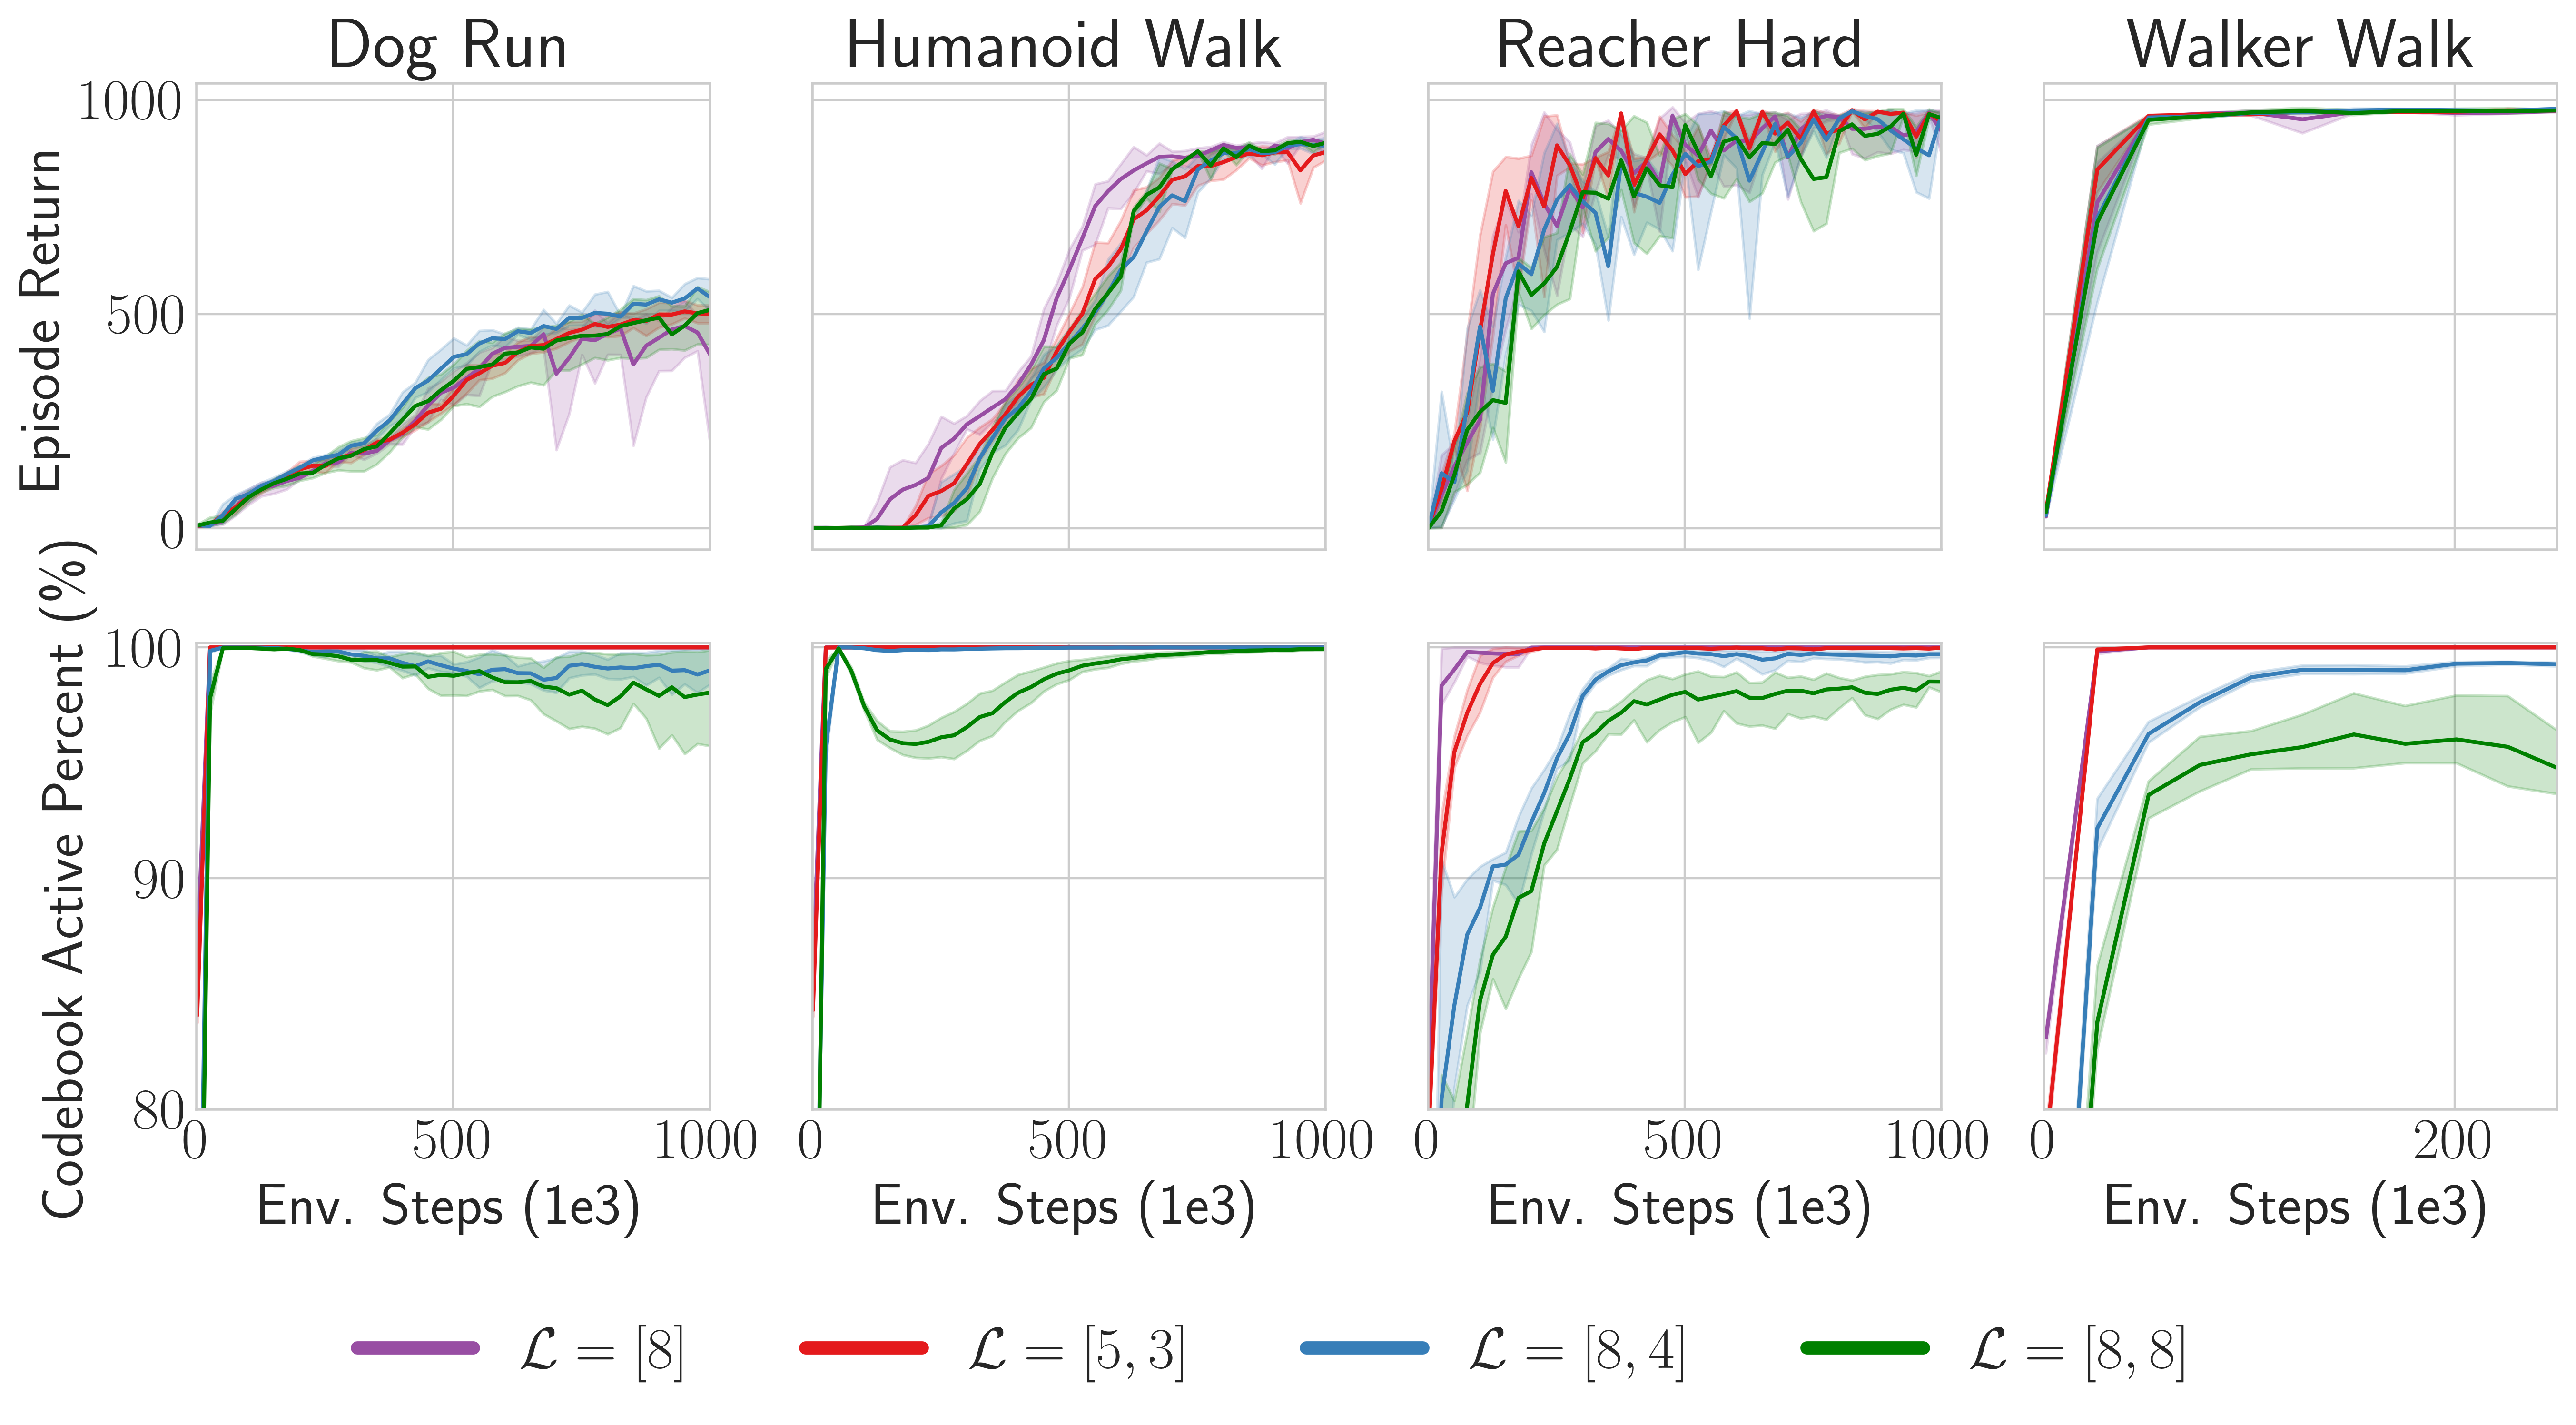

In [6]:
def plot_codebook_size_sensitivity(df):
    keys = ["episode_reward", "active_percent"]
    ncol = 4
    nrow = len(keys)
    fig, axs = plt.subplots(
        nrow,
        ncol,
        figsize=(4 * ncol, 3.5 * nrow),
        sharex="col",
        sharey="row",
    )

    for r, key in enumerate(keys):
        for idx, env in enumerate(main_envs):
            data = df[df["env"] == env]
            col = idx % ncol
            ax = axs[r, col]
            if r"$\mathcal{L}=[5, 3]$" in data.fsq_levels.unique():
                hue_order = [
                    r"$\mathcal{L}=[8]$",
                    r"$\mathcal{L}=[5, 3]$",
                    r"$\mathcal{L}=[8, 4]$",
                    r"$\mathcal{L}=[8, 8]$",
                ]
            else:
                hue_order = [
                    r"$\mathcal{L}=[8]$",
                    r"$\mathcal{L}=[8, 4]$",
                    r"$\mathcal{L}=[8, 8]$",
                ]

            legend = True if idx == len(main_envs) - 1 and r == len(keys) - 1 else False
            g = sns.lineplot(
                x="env_step",
                y=key,
                data=data,
                errorbar=("ci", 95),
                hue="fsq_levels",
                hue_order=hue_order,
                palette=COLORS,
                legend="auto" if legend else None,
                ax=ax,
            )

            if not r:
                ax.set_title(" ".join([ele.capitalize() for ele in env.split("-")]))
            if r == len(keys) - 1:
                ax.set_xlabel("Env. Steps (1e3)")
            else:
                ax.set_xlabel("")
            ax.set_ylabel("")
            if env in ["walker-walk"]:
                g.set(xlim=(0, 250))
            else:
                # g.set(xlim=(0, 2000))
                g.set(xlim=(0, 1000))
            if r > 0:
                g.set(ylim=(80, 100.2))
        axs[r][0].set_ylabel(utils.YLABELS[key])

    l = axs[-1, -1].legend(
        loc="upper center",
        bbox_to_anchor=(-1.5, -0.35),
        fancybox=False,
        shadow=False,
        ncol=len(df.fsq_levels.unique()),
    )
    for line in l.get_lines():
        line.set_linewidth(5.0)

    plt.savefig("./figs/sensitivity-to-codebook-size.pdf", bbox_inches="tight")

plot_codebook_size_sensitivity(df)